In [1]:
import os
import cv2
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import uuid
import time
import random

In [2]:
# IMAGES_PATH = os.path.join('/Users/tadiostilahun/visoal studio/data004', 'images')
# number_images = 30

In [3]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [4]:
# cap = cv2.VideoCapture(0)
# for imgnum in range(number_images):
#     print('cooecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('fram', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [5]:
#!labelme

In [6]:
# for folder in ['train', 'test', 'val']:
#     for file in os.listdir(os.path.join('/Users/tadiostilahun/visoal studio/data004', folder, 'images')):
#         filename = file.split('.')[0]+'.json'
#         existing_filepath = os.path.join('/Users/tadiostilahun/visoal studio/data004', 'labels', filename)
#         if os.path.exists(existing_filepath):
#             new_filepath = os.path.join('/Users/tadiostilahun/visoal studio/data004', folder, 'labels', filename)
#             os.replace(existing_filepath, new_filepath)

In [7]:
import albumentations as alb

/Users/tadiostilahun/visoal studio/deep_learning_enviroment/lib/python3.12/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [8]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                        keypoint_params=alb.KeypointParams(format='xy', label_fields=['class_labels']))

In [9]:
# for partition in ['train', 'test', 'val']: 
#     for image in os.listdir(os.path.join('/Users/tadiostilahun/visoal studio/data004', partition, 'images')):
#         img = cv2.imread(os.path.join('/Users/tadiostilahun/visoal studio/data004', partition, 'images', image))

#         classes = [0,0]
#         coords = [0,0,0.00001,0.00001]
#         label_path = os.path.join('/Users/tadiostilahun/visoal studio/data004', partition, 'labels', f'{image.split(".")[0]}.json')
#         if os.path.exists(label_path):
#             with open(label_path, 'r') as f:
#                 label = json.load(f)
    
#             if label['shapes'][0]['label']=='l': 
#                 classes[0] = 1
#                 coords[0] = np.squeeze(label['shapes'][0]['points'])[0]
#                 coords[1] = np.squeeze(label['shapes'][0]['points'])[1]

#             if label['shapes'][0]['label']=='r':
#                 classes[1] = 1
#                 coords[2] = np.squeeze(label['shapes'][0]['points'])[0]
#                 coords[3] = np.squeeze(label['shapes'][0]['points'])[1]

#             if len(label['shapes']) > 1:     
#                 if label['shapes'][1]['label'] =='l': 
#                     classes[0] = 1 
#                     coords[0] = np.squeeze(label['shapes'][1]['points'])[0]
#                     coords[1] = np.squeeze(label['shapes'][1]['points'])[1]

#                 if label['shapes'][1]['label'] =='r': 
#                     classes[1] = 1
#                     coords[2] = np.squeeze(label['shapes'][1]['points'])[0]
#                     coords[3] = np.squeeze(label['shapes'][1]['points'])[1]
            
#             np.divide(coords, [640,480,640,480])
                
#         try: 
#             for x in range(120):
#                 keypoints = [(coords[:2]), (coords[2:])]
#                 augmented = augmentor(image=img, keypoints=keypoints, class_labels=['l','r'])
#                 cv2.imwrite(os.path.join('/Users/tadiostilahun/visoal studio/data004/aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

#                 annotation = {}
#                 annotation['image'] = image
        #         annotation['class'] = [0,0]
        #         annotation['keypoints'] = [0,0,0,0]

        #         if os.path.exists(label_path):
        #             if len(augmented['keypoints']) > 0: 
        #                 for idx, cl in enumerate(augmented['class_labels']):
        #                     if cl == 'l': 
        #                         annotation['class'][0] = 1 
        #                         annotation['keypoints'][0] = augmented['keypoints'][idx][0]
        #                         annotation['keypoints'][1] = augmented['keypoints'][idx][1]
        #                     if cl == 'r': 
        #                         annotation['class'][1] = 1 
        #                         annotation['keypoints'][2] = augmented['keypoints'][idx][0]
        #                         annotation['keypoints'][3] = augmented['keypoints'][idx][1]
                                
        #         annotation['keypoints'] = list(np.divide(annotation['keypoints'], [450,450,450,450]))


        #         with open(os.path.join('/Users/tadiostilahun/visoal studio/data004/aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
        #             json.dump(annotation, f)

        # except Exception as e:
        #     print(e)

In [10]:
train_images = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data004/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (250,250)))
train_images = train_images.map(lambda x: x/255)

In [11]:
test_images = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data004/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (250,250)))
test_images = test_images.map(lambda x: x/255)

In [12]:
val_images = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data004/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (250,250)))
val_images = val_images.map(lambda x: x/255)

In [13]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
    return [label['keypoints']]

In [14]:
train_labels = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data004/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))


In [15]:
test_labels = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data004/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [16]:
val_labels = tf.data.Dataset.list_files('/Users/tadiostilahun/visoal studio/data004/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [17]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(7560, 7560, 1680, 1680, 1560, 1560)

In [18]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(16)
train = train.prefetch(4)

In [19]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(16)
test = test.prefetch(4)

In [20]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(16)
val = val.prefetch(4)

In [21]:
data_samples = train.as_numpy_iterator()

In [22]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


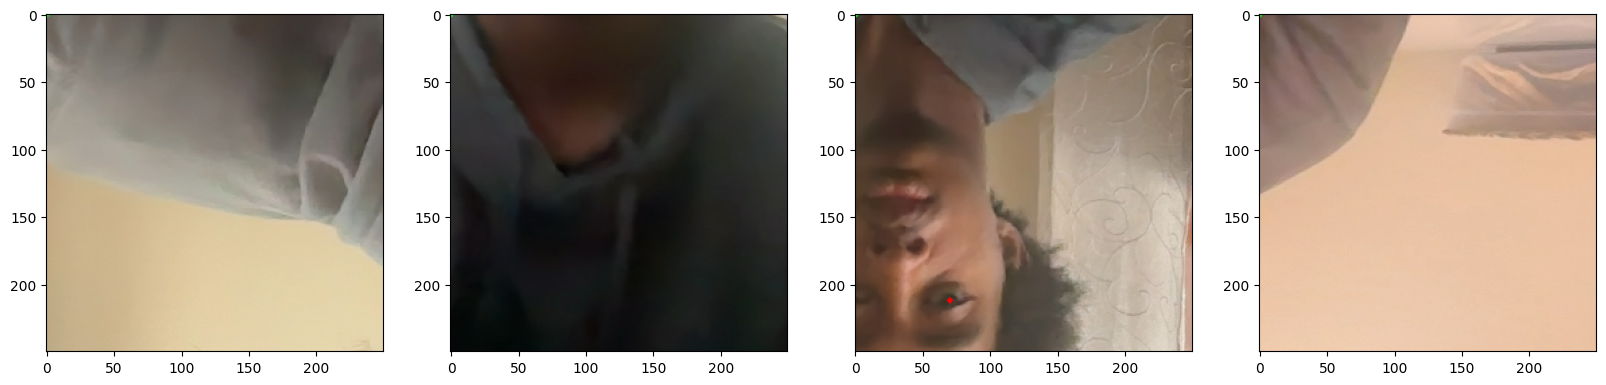

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx].copy()
    sample_coords =res[1][0][idx]

    cv2.circle(sample_image, tuple(np.multiply(sample_coords[:2], [250,250]).astype(int)), 2, (255,0,0), -1)
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[2:], [250,250]).astype(int)), 2, (0,255,0), -1)
    
    ax[idx].imshow(sample_image)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Reshape, Dropout
from tensorflow.keras.applications import ResNet152V2

In [25]:
model = Sequential([
    Input(shape=(250,250,3)), 
    ResNet152V2(include_top=False, input_shape=(250,250,3)),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(256, 3, 2, padding='same', activation='relu'),
    Conv2D(256, 2, 2, activation='relu'),
    Dropout(0.05),
    Conv2D(4, 2, 2),
    Reshape((4,))
])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ (None, 8, 8, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 8, 8, 512)      │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 1, 4)        │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,575,556 (273.04 MB)

 Trainable params: 71,431,812 (272.49 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0007)
loss = tf.keras.losses.MeanSquaredError()

/Users/tadiostilahun/visoal studio/deep_learning_enviroment/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [33]:
model.compile(optimizer, loss, run_eagerly=True)

In [29]:
X, y = train.as_numpy_iterator().next()

In [30]:
coordinnates = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [31]:
coordinnates

array([[-0.03559107,  0.2804479 ,  0.22094804,  0.11287279],
       [-0.08984475,  0.49187642, -0.47356808,  0.76614636],
       [-0.329526  ,  0.3221243 ,  0.32354754,  0.63072443],
       [-0.37727398,  0.64710593,  0.06183794,  0.16862501],
       [-0.02049886,  0.76580185,  0.17131595,  0.62337184],
       [-0.17011179,  1.4184777 ,  0.04560091,  0.38366073],
       [-0.3031808 ,  0.49262956,  0.3083475 ,  0.38767734],
       [-0.21089365,  0.7807756 , -0.22614235, -0.17430833],
       [ 0.55340326,  0.6475028 ,  0.5392701 ,  0.28040415],
       [-0.01459967,  0.15737028, -1.0495102 , -0.22146407],
       [-0.53533   ,  0.61900866, -0.08830783, -0.18668504],
       [ 0.75524795,  0.7656772 ,  0.1056383 , -0.05486488],
       [-0.66424197,  0.10062698, -0.24182831,  0.99766433],
       [ 0.19537285,  0.5516966 , -0.39417   ,  0.13978007],
       [-0.25767738,  0.21971987,  0.10714023,  0.03220928],
       [ 0.01390473,  0.25378406,  0.11688793, -0.07284021]],
      dtype=float32)

In [ ]:
hist = model.fit(train, epochs=5, validation_data=val)